<a href="https://colab.research.google.com/github/XavierCarrera/practical-machine-learning/blob/main/Decission_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline
sns.set()

In [10]:
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/titanic-test_b6547a1c-55fe-4409-8e04-67b6678214a4.csv")
train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/db/titanic-train_4adcc656-193c-46d5-a978-f254fe4f0c22_e73b185d-1cb9-4af4-a668-da1ed47b97f2.csv")

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


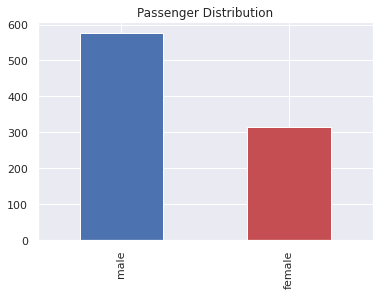

In [17]:
train_df.Sex.value_counts().plot(kind = "bar", color = ["b", "r"])
plt.title("Passenger Distribution")
plt.show()

In [19]:
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df["Sex"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [23]:
train_predictors = train_df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis = 1)

categorical_cols = [cname for cname in train_predictors.columns if 
                      train_predictors[cname].nunique() < 10 and
                      train_predictors[cname].dtype == "object"]

In [24]:
numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ["int64", "float"]]

In [25]:
my_cols = categorical_cols + numerical_cols

train_predictors = train_predictors[my_cols]

In [26]:
dummy_encoded_train_predictor = pd.get_dummies(train_predictors)

In [27]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
y_target = train_df["Survived"].values
x_features_one = dummy_encoded_train_predictor.values

In [29]:
X_train, X_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size = 0.25, random_state = 1)

In [30]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)

In [33]:
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print("Accuracy: %0.4f" % (tree_one_accuracy))

Accuracy: 0.9798


# Visualization

In [34]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file= out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("Titanic.png")

True